In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dataset_path = r'base_dir/train_dir/drd'
img_building = cv2.imread(os.path.join(dataset_path, '000c1434d8d7.png'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2GRAY)  # Convert from cv's BRG default color order to RGB
img_building = cv2.resize(img_building, (650,650))

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

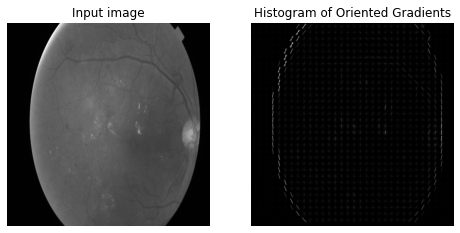

In [3]:
fd, hog_image = hog(img_building, orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_building, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

In [4]:
os.listdir(r'base_dir/train_dir')

['drd', 'no_drd']

In [6]:
dir = r"base_dir/train_dir"
#orb = cv2.ORB_create(nfeatures = 10)
categories = ["drd" , "no_drd" ]
data=[]
images= []

In [ ]:
for category in categories:
    path= os.path.join(dir,category)
    label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        images.append(drd_image)
      
        try:
            
            drd_image = cv2.resize(drd_image, (96,96))
            image = np.array( drd_image).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            data.append([image,label])
        
        except Exception as e:
            pass
    
       
print(len(data))


In [ ]:
desList=[]
for category in categories:
    path= os.path.join(dir,category)
    #label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        fd, hog_image = hog(drd_image, orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
        
#         images.append(drd_image)
      
        try:
            
            fd = cv2.resize(fd, (96,96))
            im = np.array( fd).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            desList.append(im)
        
        except Exception as e:
            pass
    
       
print(len(desList))

In [ ]:
d= desList[0:110]
print(len(d))

In [ ]:
random.shuffle(data)
features= []
labels= []


In [ ]:
for feature,label in data:
    features.append(feature)
    labels.append(label)
labels= labels[0:110]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split (d, labels , test_size= 0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing and fitting data to the random forest classifier
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(xtrain, ytrain)

In [ ]:
# Making a prediction and calculting the accuracy
y_pred = RandForest_K_best.predict(xtest)



#print("Accuracy: "+str(accuracy_score(xtest, ytest)))

accuracy = RandForest_K_best.score(xtest, ytest)

categories = ["drd" , "no_drd" ]

print(" Accuracy :" , accuracy*100)

print("Prediction is :", categories[y_pred[0]])
drd= xtest[0].reshape(96,96)

plt.imshow(drd, cmap='gray')
plt.show()

#accuracy = accuracy_score(xtest, ytest)
#print('Accuracy: ',accuracy)